<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>    
</center>
<h1 align=center><font size = 5>Support Vector Machines</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 07, 2024</font>

Import libraries and packages.

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Logistic Regression VS SVM

Read in the data on customers.

In [230]:
customers_data = pd.read_csv('customers_data.csv')

In [231]:
customers_data.head()

,debt_to_income_ratio,credit_score,Defaulted
0,7.520215,14.611884,0
1,15.129782,4.930069,1
2,8.880535,14.964281,0
3,7.594710,13.827473,0
4,6.332894,14.837548,0


Create a scatter plot to visualize the data.

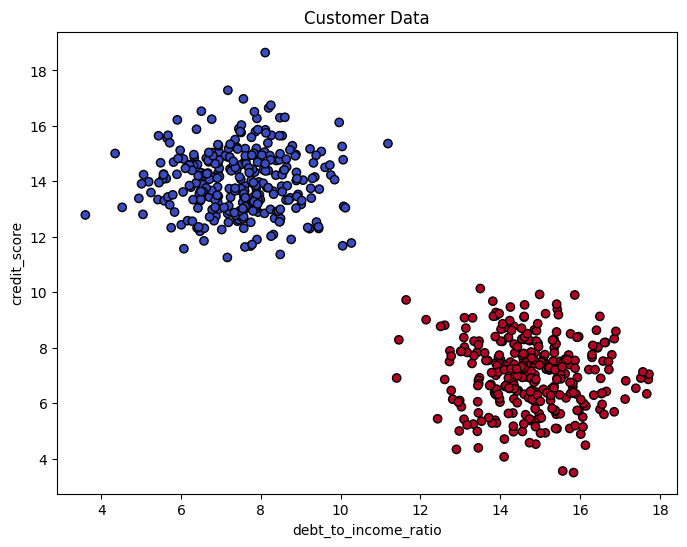

In [232]:
## Add your code here
plt.figure(figsize=(8, 6))
plt.scatter(customers_data['debt_to_income_ratio'], customers_data['credit_score'], c=customers_data['Defaulted'], cmap='coolwarm', edgecolor='k')
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score')
plt.title('Customer Data')
plt.show()



Divide the data into features and labels.

In [233]:
## Add your code here

X = customers_data[['debt_to_income_ratio', 'credit_score']].values
y = customers_data['Defaulted'].values

Standardize data.

In [234]:
## Add your code here

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




Create an instance of LogisticRegression object.

In [235]:
## Add your code here

logistic_model = LogisticRegression()
logistic_model.fit(X_scaled, y)





LogisticRegression()

Train a logistic regression model.

Get the coefficients of the logistic regression model.

In [236]:
## Add your code here

logistic_coeff = logistic_model.coef_
logistic_intercept = logistic_model.intercept_
print(logistic_coeff)
print(logistic_intercept)


[[ 3.09280798 -2.98427909]]
[0.07893008]


Construct the decision boundary for logistic regression.

In [237]:
## Get the minimum value of debt_to_income_ratio using X_scaled

x_values = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
decision_boundary_log = -(logistic_coeff[0][0] * x_values + logistic_intercept) / logistic_coeff[0][1]



Define an instance of SVM classifier. Setting C to be very large to enforce a hard margin classifier.

In [238]:
## Add your code here

svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X_scaled, y)

SVC(C=1000000.0, kernel='linear')

Get the coefficients of the SVM model.

In [239]:
## Add your code here

svm_coeff = svm_hard.coef_[0]
svm_intercept = svm_hard.intercept_[0]
print(svm_coeff)
print(svm_intercept)




[ 1.62727065 -2.53282293]
0.224803469436637


Construct the decision boundary for SVM. Use the same x_values from before.

In [240]:
## Add your code here

decision_boundary_svm = -(svm_coeff[0] * x_values + svm_intercept) / svm_coeff[1]
print(decision_boundary_svm)



[-1.17563086e+00 -1.15163981e+00 -1.12764876e+00 -1.10365772e+00
 -1.07966667e+00 -1.05567562e+00 -1.03168457e+00 -1.00769352e+00
 -9.83702469e-01 -9.59711419e-01 -9.35720370e-01 -9.11729320e-01
 -8.87738271e-01 -8.63747222e-01 -8.39756172e-01 -8.15765123e-01
 -7.91774074e-01 -7.67783024e-01 -7.43791975e-01 -7.19800925e-01
 -6.95809876e-01 -6.71818827e-01 -6.47827777e-01 -6.23836728e-01
 -5.99845679e-01 -5.75854629e-01 -5.51863580e-01 -5.27872530e-01
 -5.03881481e-01 -4.79890432e-01 -4.55899382e-01 -4.31908333e-01
 -4.07917283e-01 -3.83926234e-01 -3.59935185e-01 -3.35944135e-01
 -3.11953086e-01 -2.87962037e-01 -2.63970987e-01 -2.39979938e-01
 -2.15988888e-01 -1.91997839e-01 -1.68006790e-01 -1.44015740e-01
 -1.20024691e-01 -9.60336414e-02 -7.20425921e-02 -4.80515427e-02
 -2.40604933e-02 -6.94439151e-05  2.39216055e-02  4.79126549e-02
  7.19037042e-02  9.58947536e-02  1.19885803e-01  1.43876852e-01
  1.67867902e-01  1.91858951e-01  2.15850001e-01  2.39841050e-01
  2.63832099e-01  2.87823

Construct the margins.

In [241]:
## Add your code here

margin = 1 / np.sqrt(np.sum(svm_coeff ** 2))
margin_up = decision_boundary_svm + margin
margin_down = decision_boundary_svm - margin

print(margin_up)
print(margin_down)



[-0.8434618  -0.81947075 -0.79547971 -0.77148866 -0.74749761 -0.72350656
 -0.69951551 -0.67552446 -0.65153341 -0.62754236 -0.60355131 -0.57956026
 -0.55556921 -0.53157816 -0.50758711 -0.48359606 -0.45960501 -0.43561396
 -0.41162292 -0.38763187 -0.36364082 -0.33964977 -0.31565872 -0.29166767
 -0.26767662 -0.24368557 -0.21969452 -0.19570347 -0.17171242 -0.14772137
 -0.12373032 -0.09973927 -0.07574822 -0.05175717 -0.02776613 -0.00377508
  0.02021597  0.04420702  0.06819807  0.09218912  0.11618017  0.14017122
  0.16416227  0.18815332  0.21214437  0.23613542  0.26012647  0.28411752
  0.30810857  0.33209962  0.35609066  0.38008171  0.40407276  0.42806381
  0.45205486  0.47604591  0.50003696  0.52402801  0.54801906  0.57201011
  0.59600116  0.61999221  0.64398326  0.66797431  0.69196536  0.71595641
  0.73994746  0.7639385   0.78792955  0.8119206   0.83591165  0.8599027
  0.88389375  0.9078848   0.93187585  0.9558669   0.97985795  1.003849
  1.02784005  1.0518311   1.07582215  1.0998132   1.12

Get the support vectors. Refer to the scikit learn documentation.

In [242]:
## Add your code here

support_vectors = svm_hard.support_vectors_
print(support_vectors)


[[-0.22326817  0.34012868]
 [ 0.13582582 -0.21879585]]


Plot everything on the same plot.

<Figure size 1000x800 with 0 Axes>

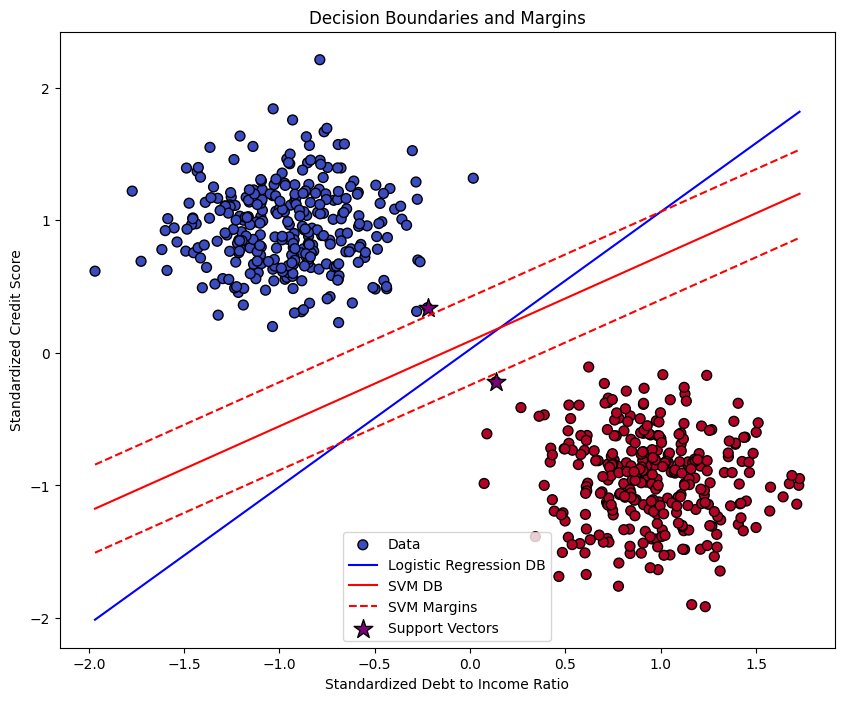

In [243]:
plt.figure(figsize=(10, 8))

plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50, label='Data')


plt.plot(x_values, decision_boundary_log, color='blue', linestyle='-', label='Logistic Regression DB')


plt.plot(x_values, decision_boundary_svm, color='red', linestyle='-', label='SVM DB')


plt.plot(x_values, margin_up, color='red', linestyle='--', label='SVM Margins')
plt.plot(x_values, margin_down, color='red', linestyle='--')


plt.scatter(support_vectors[:, 0], support_vectors[:, 1], edgecolor='k', facecolors='purple', label='Support Vectors', marker = "*", s = 200)

plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Decision Boundaries and Margins')
plt.legend()
plt.show()




## Soft Margin SVM

In [244]:
customers_data = pd.read_csv('customers_data_full.csv')

In [245]:
customers_data.head()

,debt_to_income_ratio,credit_score,Defaulted
0,8.660771,12.432697,0
1,16.988660,6.198146,1
2,13.105094,4.957098,1
3,15.371849,6.169990,1
4,14.387207,11.443520,1


#### Create a hard-maring classifier and create a plot to visualize the data points along with the resulting decision boundary, margins, and support vectors.

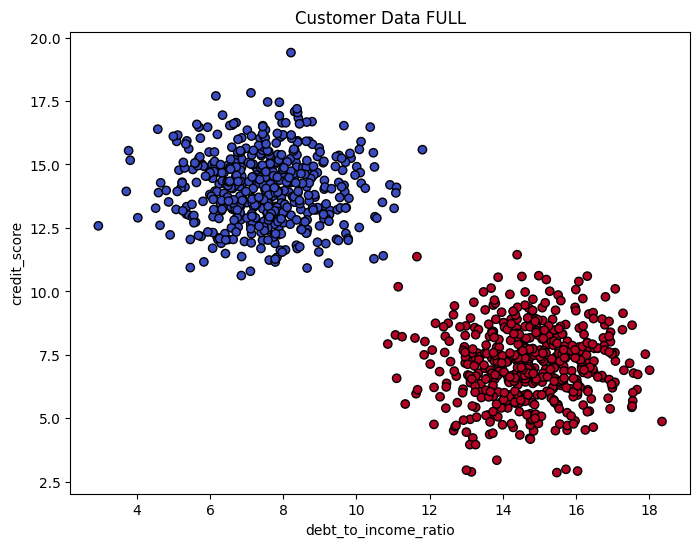

In [246]:
## Add your code here
plt.figure(figsize=(8, 6))
plt.scatter(customers_data['debt_to_income_ratio'], customers_data['credit_score'], c=customers_data['Defaulted'], cmap='coolwarm', edgecolor='k')
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score')
plt.title('Customer Data FULL')
plt.show()



In [247]:
X = customers_data[['debt_to_income_ratio', 'credit_score']].values
y = customers_data['Defaulted'].values

In [248]:
X_scaled = scaler.fit_transform(X)

In [249]:
hard_margin_svm = SVC(kernel='linear', C=1e6)
hard_margin_svm.fit(X_scaled, y)

SVC(C=1000000.0, kernel='linear')

In [250]:
x_values = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)

In [251]:
hard_margin_coeff = hard_margin_svm.coef_[0]

In [252]:
hard_margin_intercept = hard_margin_svm.intercept_[0]

In [253]:
decision_boundary_hard = -(hard_margin_coeff[0] * x_values + hard_margin_intercept) / hard_margin_coeff[1]

In [254]:
margin_hard = 1 / np.sqrt(np.sum(hard_margin_coeff ** 2))
margin_hard_up = decision_boundary_hard + margin_hard
margin_hard_down = decision_boundary_hard - margin_hard

In [255]:
support_vectors_hard = hard_margin_svm.support_vectors_

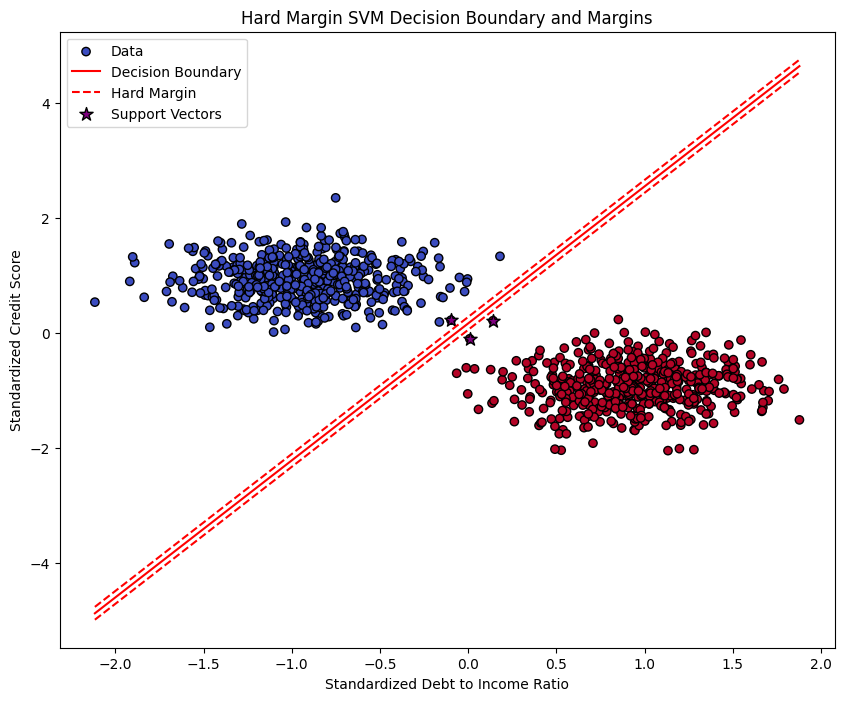

In [256]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', label='Data')

plt.plot(x_values, decision_boundary_hard, color='red', linestyle='-', label='Decision Boundary')
plt.plot(x_values, margin_hard_up, color='red', linestyle='--', label='Hard Margin')
plt.plot(x_values, margin_hard_down, color='red', linestyle='--')

plt.scatter(support_vectors_hard[:, 0], support_vectors_hard[:, 1], s=100, edgecolor='k', facecolors='purple', label='Support Vectors', marker = "*")


plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Hard Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()

#### Create a soft-maring classifier and create a plot to visualize the data points along with the resulting decision boundary, margins, and support vectors.

In [257]:
soft_margin_svm = SVC(kernel='linear', C=1.0)
soft_margin_svm.fit(X_scaled, y)

SVC(kernel='linear')

In [258]:
soft_margin_coeff = soft_margin_svm.coef_[0]
soft_margin_intercept = soft_margin_svm.intercept_[0]
decision_boundary_soft = -(soft_margin_coeff[0] * x_values + soft_margin_intercept) / soft_margin_coeff[1]


In [259]:
margin_soft = 1 / np.sqrt(np.sum(soft_margin_coeff ** 2))
margin_soft_up = decision_boundary_soft + margin_soft
margin_soft_down = decision_boundary_soft - margin_soft

In [260]:
support_vectors_soft = soft_margin_svm.support_vectors_

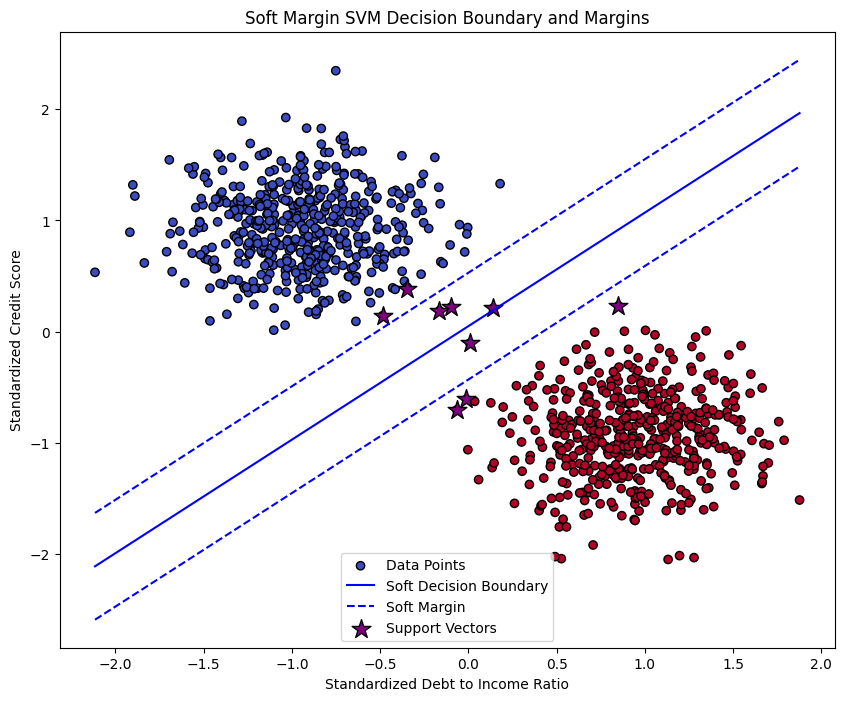

In [261]:
plt.figure(figsize=(10, 8))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', label='Data Points')
plt.plot(x_values, decision_boundary_soft, color='blue', linestyle='-', label='Soft Decision Boundary')
plt.plot(x_values, margin_soft_up, color='blue', linestyle='--', label='Soft Margin')
plt.plot(x_values, margin_soft_down, color='blue', linestyle='--')

plt.scatter(support_vectors_soft[:, 0], support_vectors_soft[:, 1], s=200, edgecolor='k', facecolors='purple', label='Support Vectors', marker = "*")


plt.xlabel('Standardized Debt to Income Ratio')
plt.ylabel('Standardized Credit Score')
plt.title('Soft Margin SVM Decision Boundary and Margins')
plt.legend()
plt.show()

## SVM with RBF Kernel

In [262]:
patients_data = pd.read_csv('patients_data.csv')

In [263]:
patients_data.head()

,blood_biomarker_level,heart_rate_variability,Risk
0,0.422494,0.206446,1
1,-0.382710,0.158482,1
2,-0.568391,0.306051,1
3,-0.389914,0.349151,1
4,0.454089,-0.890466,0


Create a scatter plot of the data.

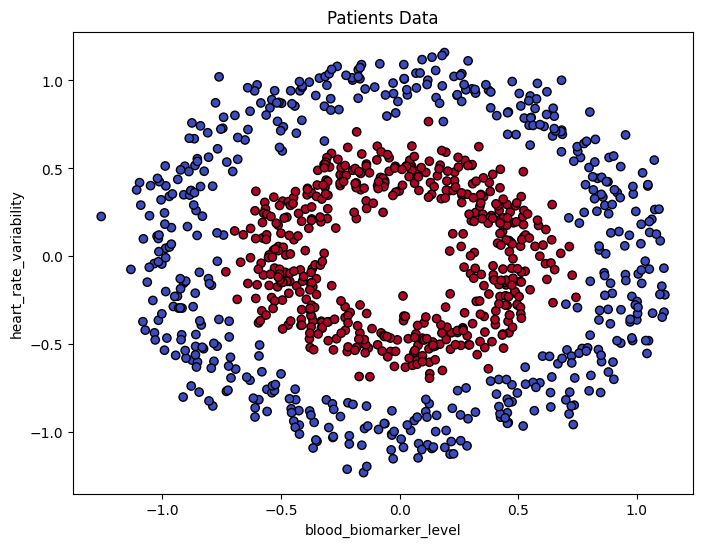

In [264]:
## Add your code here

plt.figure(figsize=(8, 6))
plt.scatter(patients_data['blood_biomarker_level'], patients_data['heart_rate_variability'], c=patients_data['Risk'], cmap='coolwarm', edgecolor='k')
plt.xlabel('blood_biomarker_level')
plt.ylabel('heart_rate_variability')
plt.title('Patients Data')
plt.show()

Split the data into features and target variable.

In [265]:
## Add your code here

X = patients_data[['blood_biomarker_level', 'heart_rate_variability']].values
y = patients_data['Risk'].values

X_scaled = scaler.fit_transform(X)


Define an instance called **svm_rbf** of SVC with a *Gaussian kernel*, *C* = 1, *sigma* = 0.5

In [266]:
## Add your code here

svm_rbf = SVC(kernel = 'rbf', C = 1, gamma = 2) ## gamma is 2 here because 1 / (0.5*0.5 *2) = 1 / (0.25*2) = 1 / 0.5 = 2
svm_rbf.fit(X_scaled, y)



SVC(C=1, gamma=2)

Fit the SVM instance on the training data.

Check out the support vectors.

In [267]:
## Add your code here

support_vectors_rbf = svm_rbf.support_vectors_

Create a grid to construct decision boundary.

In [268]:
x_min, x_max = X_scaled[:, 0].min() - 0.25, X_scaled[:, 0].max() + 0.25
y_min, y_max = X_scaled[:, 1].min() - 0.25, X_scaled[:, 1].max() + 0.25
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Construct SVM decision boundary.

In [269]:
grid = np.c_[xx.ravel(), yy.ravel()]

In [270]:
decision_boundary = svm_rbf.decision_function(grid).reshape(xx.shape)

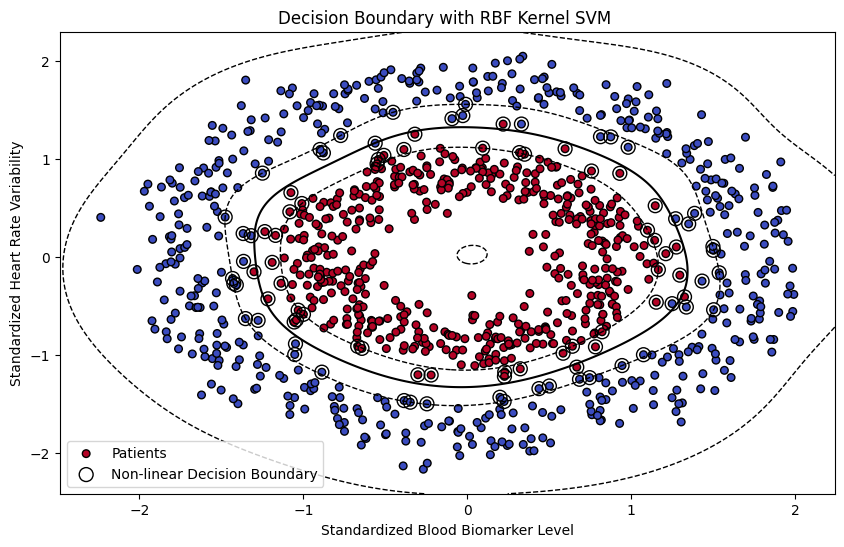

In [271]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y,
    cmap='coolwarm',
    s=30,
    edgecolor='k')

plt.contour(
    xx,
    yy,
    decision_boundary,
    levels=[0],
    colors='black',
    linewidths=1.5,
    linestyles='-'
)

plt.contour(
    xx,
    yy,
    decision_boundary,
    levels=[-1, 1],
    colors='black',
    linestyles='--',
    linewidths=1
)

plt.scatter(
    svm_rbf.support_vectors_[:, 0],
    svm_rbf.support_vectors_[:, 1],
    s=100,
    facecolors='none',
    edgecolors='k',
    label='Support Vectors'
)

plt.xlabel('Standardized Blood Biomarker Level')
plt.ylabel('Standardized Heart Rate Variability')
plt.title("Decision Boundary with RBF Kernel SVM ")
plt.legend(["Patients", "Non-linear Decision Boundary"])
plt.show()